# End-to-end Learning for Early Classification of Time Series (ELECTS)

## Train and predict with an RNN trained with ELECTS

Early predictions with the RNN model.

Please run `python train.py` first to generate `snapshots/model.pth`

## Import dependencies

In [2]:
import torch
from data import BugSenseData
import matplotlib.pyplot as plt
from earlyrnn import EarlyRNN
import seaborn as sns
import numpy as np
import os
CLASSES = ['ecoli', 'efaecalis/kpneumoniae', 'ssaprophyticus/ehormaechei', 
           'paeruginosa/pmirabilis', 'saureus', 'sterile']

In [5]:
script_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
print(script_dir)
root_dir = os.path.join(script_dir,  "BugSenseData/Usable/test")
ds = BugSenseData(root_dir, partition="eval", sequencelength=80, split_ratio=(0,0,1))
model = EarlyRNN()
model.eval()
model.load_state_dict(torch.load("/media/storage/users/go98kef/snapshots/bugsense_model.pth"))
print(len(ds))


/media/storage/users/go98kef
36


/tmp/ipykernel_152434/1692423875.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/media/storage/users/go98kef/snapshots/bugsense_model.

## Take time series sample from dataset

The dataset contains Sentinel 2 satellite time series of Bavarian fields in 2018.
Each line represents spectral reflectances in one of 13 bands acquired by the satellite over the year.

In [16]:
# change this to take different samples
index = 17
X,y = ds[index]
print(X.shape)

# fig, ax = plt.subplots(figsize=(12,6))
# ax.plot(X)
# ax.set_title(CLASSES[y])
# sns.despine(offset=0.2)

torch.Size([3, 80, 190, 20])


## Predict with the model

tensor([[3.7883e-09, 5.3300e-09, 7.9719e-09, 1.0877e-08, 1.2225e-08, 1.1170e-08,
         8.8737e-09, 6.7024e-09, 5.1414e-09, 4.5841e-09, 8.6719e-09, 2.3087e-07,
         2.5313e-04, 7.1752e-02, 4.7051e-01, 6.8775e-01, 7.6091e-01, 7.9063e-01,
         8.0539e-01, 8.1400e-01, 8.1967e-01, 8.2373e-01, 8.2678e-01, 8.2914e-01,
         8.3098e-01, 8.3242e-01, 8.3355e-01, 8.3446e-01, 8.3519e-01, 8.3578e-01,
         8.3627e-01, 8.3667e-01, 8.3701e-01, 8.3730e-01, 8.3756e-01, 8.3779e-01,
         8.3799e-01, 8.3816e-01, 8.3830e-01, 8.3842e-01, 8.3851e-01, 8.3858e-01,
         8.3863e-01, 8.3866e-01, 8.3869e-01, 8.3870e-01, 8.3872e-01, 8.3872e-01,
         8.3872e-01, 8.3871e-01, 8.3870e-01, 8.3869e-01, 8.3867e-01, 8.3866e-01,
         8.3864e-01, 8.3862e-01, 8.3860e-01, 8.3858e-01, 8.3856e-01, 8.3853e-01,
         8.3850e-01, 8.3847e-01, 8.3844e-01, 8.3842e-01, 8.3839e-01, 8.3836e-01,
         8.3832e-01, 8.3829e-01, 8.3826e-01, 8.3822e-01, 8.3819e-01, 8.3815e-01,
         8.3811e-01, 8.3807e

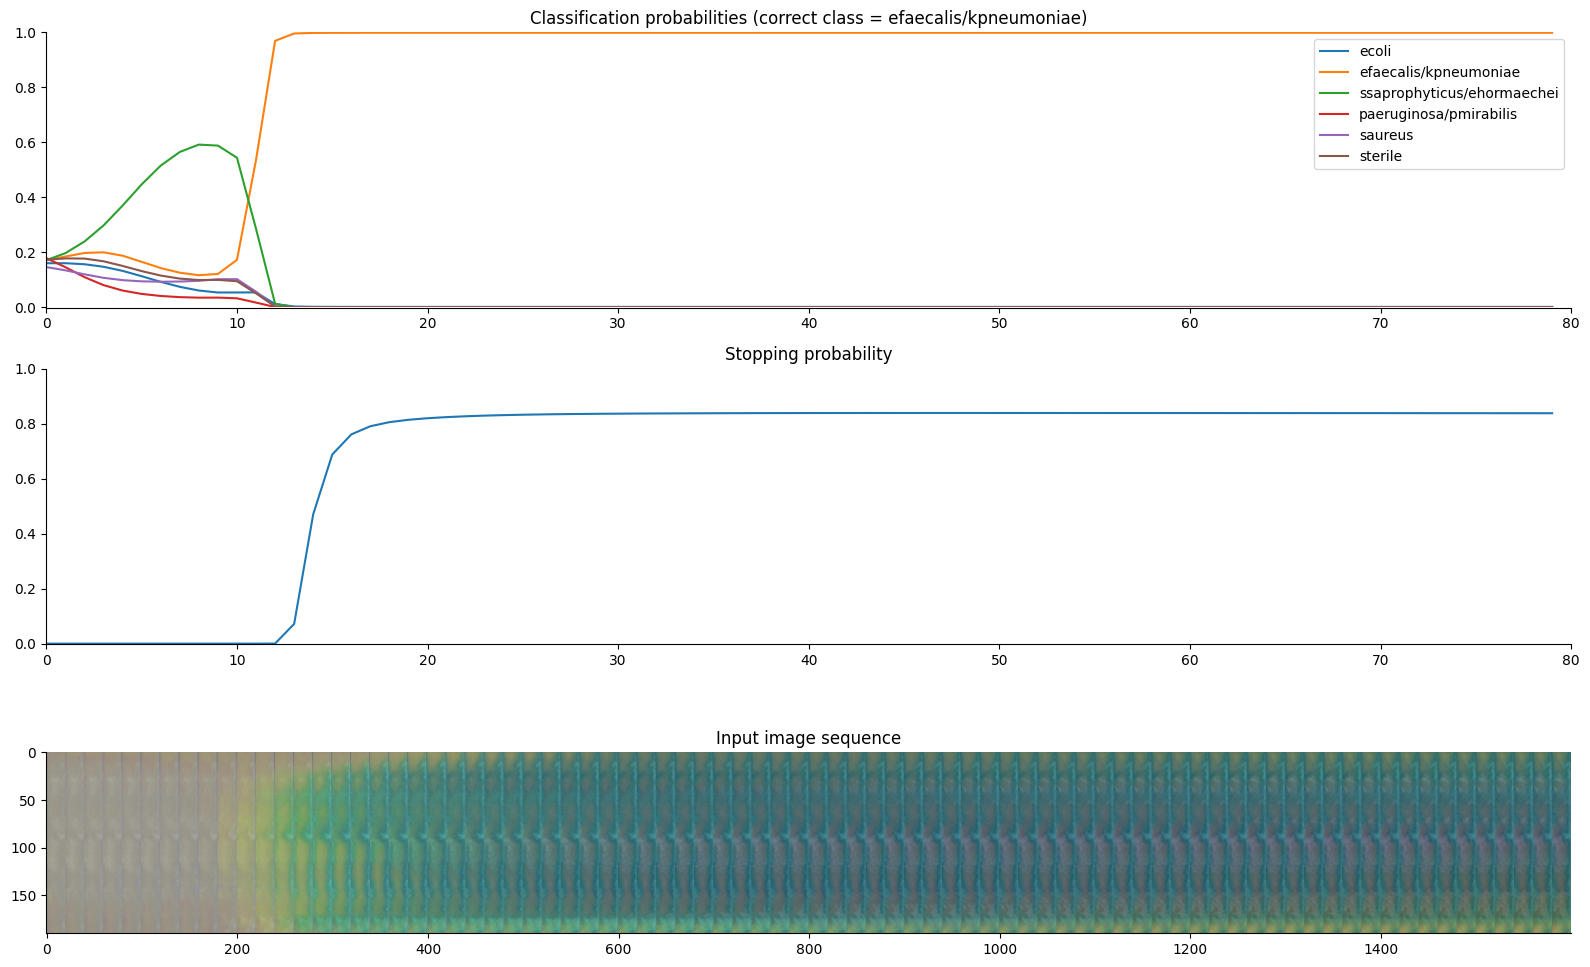

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X = X.to(device)
model = model.to(device)

log_class_probabilities, probability_stopping = model(X[:80].unsqueeze(0))
print(probability_stopping.shape)

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(16, 10))

# Classification probabilities
ax = axs[0]
ax.plot(log_class_probabilities.squeeze().cpu().exp().detach().numpy())
ax.set_ylim(0, 1)
ax.set_xlim(0, 80)
ax.legend(CLASSES, loc=1)
ax.set_title(f"Classification probabilities (correct class = {CLASSES[y[0]]})")

# Stopping probability
ax = axs[1]
ax.plot( probability_stopping.squeeze().cpu().detach().numpy())
ax.set_title("Stopping probability")
ax.set_ylim(0, 1)
ax.set_xlim(0, 80)
sns.despine(offset=0.2)

# Input sequence visualization
ax = axs[2]
X_np = X.cpu().detach().numpy()  # Shape: [80, 3, 190, 20]
X_np = np.transpose(X_np, (1, 2, 3, 0))  # Shape: [80, 190, 20, 3] for RGB

# Create a montage of images along the time axis
montage = np.concatenate(X_np, axis=1)  # Stack along the width
ax.imshow(montage)
ax.set_title("Input image sequence")
# ax.axis("off")

plt.tight_layout()
plt.show()
